# Project Notebook: Optimizing DataFrames and Processing in Chunks

## 1. Introduction 

In this project, we'll practice working with chunked dataframes and optimizing a dataframe's memory usage. We'll be working with financial lending data from Lending Club, a marketplace for personal loans that matches borrowers with investors. You can read more about the marketplace on its website.

The Lending Club's website lists approved loans. Qualified investors can view the borrower's credit score, the purpose of the loan, and other details in the loan applications. Once a lender is ready to back a loan, it selects the amount of money it wants to fund. When the loan amount the borrower requested is fully funded, the borrower receives the money, minus the origination fee that Lending Club charges.

We'll be working with a dataset of loans approved from 2007-2011 (https://bit.ly/3H2XVgC). We've already removed the desc column for you to make our system run more quickly.

If we read in the entire data set, it will consume about 67 megabytes of memory. Let's imagine that we only have 10 megabytes of memory available throughout this project, so you can practice the concepts you learned in the last two lessons.

**Tasks**

1. Read in the first five lines from `loans_2007.csv` (https://bit.ly/3H2XVgC) and look for any data quality issues.

2. Read in the first 1000 rows from the data set, and calculate the total memory usage for these rows. Increase or decrease the number of rows to converge on a memory usage under five megabytes (to stay on the conservative side).

In [1]:
# Importing pandas
import pandas as pd
pd.options.display.max_columns = 99
# Your code goes here
loans = pd.read_csv("loans_2007.csv")
loans.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


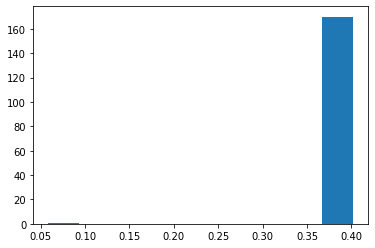

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

memory_footprints = []
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=250)
for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/(1024*1024))

plt.hist(memory_footprints)
plt.show()



## 2. Exploring the Data in Chunks

Let's familiarize ourselves with the columns to see which ones we can optimize. In the first lesson, we explored column types by reading in the full dataframe. In this project, let's try to understand the column types better while using dataframe chunks.

**Tasks**

For each chunk:
* How many columns have a numeric type? 
* How many have a string type?
* How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?
* Which float columns have no missing values and could be candidates for conversion to the integer type?
* Calculate the total memory usage across all of the chunks.

In [3]:
# Your code goes here
print(loans._data)

BlockManager
Items: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=42538, step=1

How many columns have a numeric type? 30
How many have a string type? 22

In [4]:
loans_method4 = loans.iloc[:,[0, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 29, 31, 41, 43, 46,]].values.ravel()
list(loans_method4)

[1077501,
 ' 36 months',
 ' 10.65%',
 'B',
 'B2',
 nan,
 '10+ years',
 'RENT',
 'Verified',
 'Dec-2011',
 'Fully Paid',
 'n',
 'credit_card',
 'Computer',
 '860xx',
 'AZ',
 'Jan-1985',
 '83.7%',
 'f',
 'Jan-2015',
 'Jun-2016',
 'INDIVIDUAL',
 1077430,
 ' 60 months',
 ' 15.27%',
 'C',
 'C4',
 'Ryder',
 '< 1 year',
 'RENT',
 'Source Verified',
 'Dec-2011',
 'Charged Off',
 'n',
 'car',
 'bike',
 '309xx',
 'GA',
 'Apr-1999',
 '9.4%',
 'f',
 'Apr-2013',
 'Sep-2013',
 'INDIVIDUAL',
 1077175,
 ' 36 months',
 ' 15.96%',
 'C',
 'C5',
 nan,
 '10+ years',
 'RENT',
 'Not Verified',
 'Dec-2011',
 'Fully Paid',
 'n',
 'small_business',
 'real estate business',
 '606xx',
 'IL',
 'Nov-2001',
 '98.5%',
 'f',
 'Jun-2014',
 'Jun-2016',
 'INDIVIDUAL',
 1076863,
 ' 36 months',
 ' 13.49%',
 'C',
 'C1',
 'AIR RESOURCES BOARD',
 '10+ years',
 'RENT',
 'Source Verified',
 'Dec-2011',
 'Fully Paid',
 'n',
 'other',
 'personel',
 '917xx',
 'CA',
 'Feb-1996',
 '21%',
 'f',
 'Jan-2015',
 'Apr-2016',
 'INDIVIDUAL'

In [5]:
def show_missing(loans):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in loans.columns:
        variables.append(item)
        dtypes.append(loans[item].dtype)
        count.append(len(loans[item]))
        unique.append(len(loans[item].unique()))
        missing.append(loans[item].isna().sum())
        pc_missing.append(round((loans[item].isna().sum() / len(loans[item])) * 100, 2))


    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

show_missing(loans)

,variable,dtype,count,unique,missing,pc_missing
0,id,object,42538,42538,0,0.00
1,member_id,float64,42538,42536,3,0.01
2,loan_amnt,float64,42538,899,3,0.01
3,funded_amnt,float64,42538,1052,3,0.01
4,funded_amnt_inv,float64,42538,9247,3,0.01
5,term,object,42538,3,3,0.01
6,int_rate,object,42538,395,3,0.01
7,installment,float64,42538,16460,3,0.01
8,grade,object,42538,8,3,0.01
9,sub_grade,object,42538,36,3,0.01


## 3. Optimizing String Columns

We can achieve the greatest memory improvements by converting the string columns to a numeric type. Let's convert all of the columns where the values are less than 50% unique to the category type, and the columns that contain numeric values to the `float` type.

While working with dataframe chunks:
* Determine which string columns you can convert to a numeric type if you clean them. For example, the `int_rate` column is only a string because of the % sign at the end.
* Determine which columns have a few unique values and convert them to the category type. For example, you may want to convert the grade and `sub_grade` columns.
Based on your conclusions, perform the necessary type changes across all chunks. * Calculate the total memory footprint, and compare it with the previous one.

In [8]:
# Your code goes here
obj_cols = loans.select_dtypes(include=['object'])
obj_cols_mem = obj_cols.memory_usage(deep=True)
obj_cols_sum = obj_cols_mem.sum() / 1048576
print(obj_cols_sum)

56.70643901824951


In [9]:
for col in loans.select_dtypes(include=['object']):
    num_unique_values = len(loans[col].unique())
    num_total_values = len(loans[col])
    if num_unique_values / num_total_values < 0.5:
        loans[col] = loans[col].astype('category')
        
print(loans.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          42538 non-null  object  
 1   member_id                   42535 non-null  float64 
 2   loan_amnt                   42535 non-null  float64 
 3   funded_amnt                 42535 non-null  float64 
 4   funded_amnt_inv             42535 non-null  float64 
 5   term                        42535 non-null  category
 6   int_rate                    42535 non-null  category
 7   installment                 42535 non-null  float64 
 8   grade                       42535 non-null  category
 9   sub_grade                   42535 non-null  category
 10  emp_title                   39909 non-null  object  
 11  emp_length                  41423 non-null  category
 12  home_ownership              42535 non-null  category
 13  annual_inc      

In [10]:
int_cols = loans.select_dtypes(include=['int']).columns

# Write you code below
for int in int_cols:
    loans[col] = pd.to_float(loans[col], downcast='int')

## 4. Optimizing Numeric Columns

It looks like we were able to realize some powerful memory savings by converting to the category type and converting string columns to numeric ones.

Now let's optimize the numeric columns using the `pandas.to_numeric()` function.

**Tasks**

While working with dataframe chunks:
* Identify float columns that contain missing values, and that we can convert to a more space efficient subtype.
* Identify float columns that don't contain any missing values, and that we can convert to the integer type because they represent whole numbers.
* Based on your conclusions, perform the necessary type changes across all chunks.
* Calculate the total memory footprint and compare it with the previous one.




In [ ]:
# Your code goes here
import numpy as np
def change_to_int(df, col_name):
    # Get the minimum and maximum values
    col_max = df[col_name].max()
    col_min = df[col_name].min()
    # Find the datatype
    for dtype_name in ['int8', 'int16', 'int32', 'int64']:
        # Check if this datatype can hold all values
        if col_max <  np.iinfo(dtype_name).max and col_min > np.iinfo(dtype_name).min:
            df[col_name] = df[col_name].astype(dtype_name)
            break

# Add you code below
float_loans = loans.select_dtypes(include=['float64'])
print(float_loans.isnull().sum())
# By running we got that ExhibitionSortOrder has no missing values
change_to_int(loans, 'ExhibitionSortOrder')
print(loans['ExhibitionSortOrder'].dtype)

## Next Steps

We've practiced optimizing a dataframe's memory footprint and working with dataframe chunks. Here's an idea for some next steps:

Create a function that automates as much of the work you just did as possible, so that you could use it on other Lending Club data sets. This function should:

* Determine the optimal chunk size based on the memory constraints you provide.

* Determine which string columns can be converted to numeric ones by removing the `%` character.

* Determine which numeric columns can be converted to more space efficient representations.


In [ ]:
# Your code goes here